Link to R sources: https://github.com/MatrixNorm/kaggle/tree/master/R_sources/house_prices

## DISCLAIMER. This book is probably useless apart from warming up dplyr/ggplot skills.

All sources are in R_sources/house_price/ folder.

In [150]:
setwd(paste0(Sys.getenv('R_SOURCES'), '/house_prices'))

# load sources
house_prices <- source('main.R', local = TRUE)$value

attr_sel <- house_prices$attributes_selection

# load data
combinedData <- house_prices$helpers$load_data()

# dimensions check
c(
    combinedData %>% dim %>% show_list.html("combined"),
    combinedData %>% filter(dataSource == "train") %>% dim %>% show_list.html("train"),
    combinedData %>% filter(dataSource == "test") %>% dim %>% show_list.html("test")
) %>% paste0(collapse='') %>% display_html

combined 2919 82 train 1460 82 test 1459 82

In [148]:
categColnames <- house_prices$helpers$get_character_colnames(combined_dataset)
numerColnames <- house_prices$helpers$get_numeric_colnames(combined_dataset)

categColnames %>% show_list("Categorical factors")
numerColnames %>% show_list("Numeric factors")

(45 elems) Categorical factors Alley BldgType BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 BsmtQual CentralAir Condition1 Condition2 Electrical ExterCond Exterior1st Exterior2nd ExterQual Fence FireplaceQu Foundation Functional GarageCond GarageFinish GarageQual GarageType Heating HeatingQC HouseStyle KitchenQual LandContour LandSlope LotConfig LotShape MasVnrType MiscFeature MoSold MSSubClass MSZoning Neighborhood PavedDrive PoolQC RoofMatl RoofStyle SaleCondition SaleType Street Utilities

(35 elems) Numeric factors BedroomAbvGr BsmtFinSF1 BsmtFinSF2 BsmtFullBath BsmtHalfBath BsmtUnfSF EnclosedPorch Fireplaces FullBath GarageArea GarageCars GarageYrBlt GrLivArea HalfBath KitchenAbvGr LotArea LotFrontage LowQualFinSF MasVnrArea MiscVal OpenPorchSF OverallCond OverallQual PoolArea SalePrice ScreenPorch TotalBsmtSF TotRmsAbvGrd WoodDeckSF X1stFlrSF X2ndFlrSF X3SsnPorch YearBuilt YearRemodAdd YrSold

In [151]:
categData <- 
    combined_dataset %>% 
    select(house_prices$helpers$get_character_colnames(combined_dataset), SalePrice)

categData %>% glimpse

Observations: 2,919
Variables: 46
$ Alley         <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N...
$ BldgType      <chr> "1Fam", "1Fam", "1Fam", "1Fam", "1Fam", "1Fam", "1Fam...
$ BsmtCond      <chr> "TA", "TA", "TA", "Gd", "TA", "TA", "TA", "TA", "TA",...
$ BsmtExposure  <chr> "No", "Gd", "Mn", "No", "Av", "No", "Av", "Mn", "No",...
$ BsmtFinType1  <chr> "GLQ", "ALQ", "GLQ", "ALQ", "GLQ", "GLQ", "GLQ", "ALQ...
$ BsmtFinType2  <chr> "Unf", "Unf", "Unf", "Unf", "Unf", "Unf", "Unf", "BLQ...
$ BsmtQual      <chr> "Gd", "Gd", "Gd", "TA", "Gd", "Gd", "Ex", "Gd", "TA",...
$ CentralAir    <chr> "Y", "Y", "Y", "Y", "Y", "Y", "Y", "Y", "Y", "Y", "Y"...
$ Condition1    <chr> "Norm", "Feedr", "Norm", "Norm", "Norm", "Norm", "Nor...
$ Condition2    <chr> "Norm", "Norm", "Norm", "Norm", "Norm", "Norm", "Norm...
$ Electrical    <chr> "SBrkr", "SBrkr", "SBrkr", "SBrkr", "SBrkr", "SBrkr",...
$ ExterCond     <chr> "TA", "TA", "TA", "TA", "TA", "TA", "TA", "TA", "TA",...
$ Exterior1st   <c

In [153]:
numerData <- 
    combined_dataset %>% 
    select(house_prices$helpers$get_numeric_colnames(combined_dataset))

numerData %>% glimpse

Observations: 2,919
Variables: 35
$ BedroomAbvGr  <int> 3, 3, 3, 3, 4, 1, 3, 3, 2, 2, 3, 4, 2, 3, 2, 2, 2, 2,...
$ BsmtFinSF1    <int> 706, 978, 486, 216, 655, 732, 1369, 859, 0, 851, 906,...
$ BsmtFinSF2    <int> 0, 0, 0, 0, 0, 0, 0, 32, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ BsmtFullBath  <int> 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,...
$ BsmtHalfBath  <int> 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ BsmtUnfSF     <int> 150, 284, 434, 540, 490, 64, 317, 216, 952, 140, 134,...
$ EnclosedPorch <int> 0, 0, 0, 272, 0, 0, 0, 228, 205, 0, 0, 0, 0, 0, 176, ...
$ Fireplaces    <int> 0, 1, 1, 1, 1, 0, 1, 2, 2, 2, 0, 2, 0, 1, 1, 0, 1, 0,...
$ FullBath      <int> 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 3, 1, 2, 1, 1, 1, 2,...
$ GarageArea    <int> 548, 460, 608, 642, 836, 480, 636, 484, 468, 205, 384...
$ GarageCars    <int> 2, 2, 2, 3, 3, 2, 2, 2, 2, 1, 1, 3, 1, 3, 1, 2, 2, 2,...
$ GarageYrBlt   <int> 2003, 1976, 2001, 1998, 2000, 1993, 2004, 1973, 1931,...
$ GrLivArea     <i

# "Normal Paper" applied to SalePrice

var value normed_value 
 
 price 755000.00000 7.226343 
 price_log 13.53447 3.781237 
 
 

 
 
 
 
 
 
 
 var L2 
 
 price 7.46 
 price_log 0.65

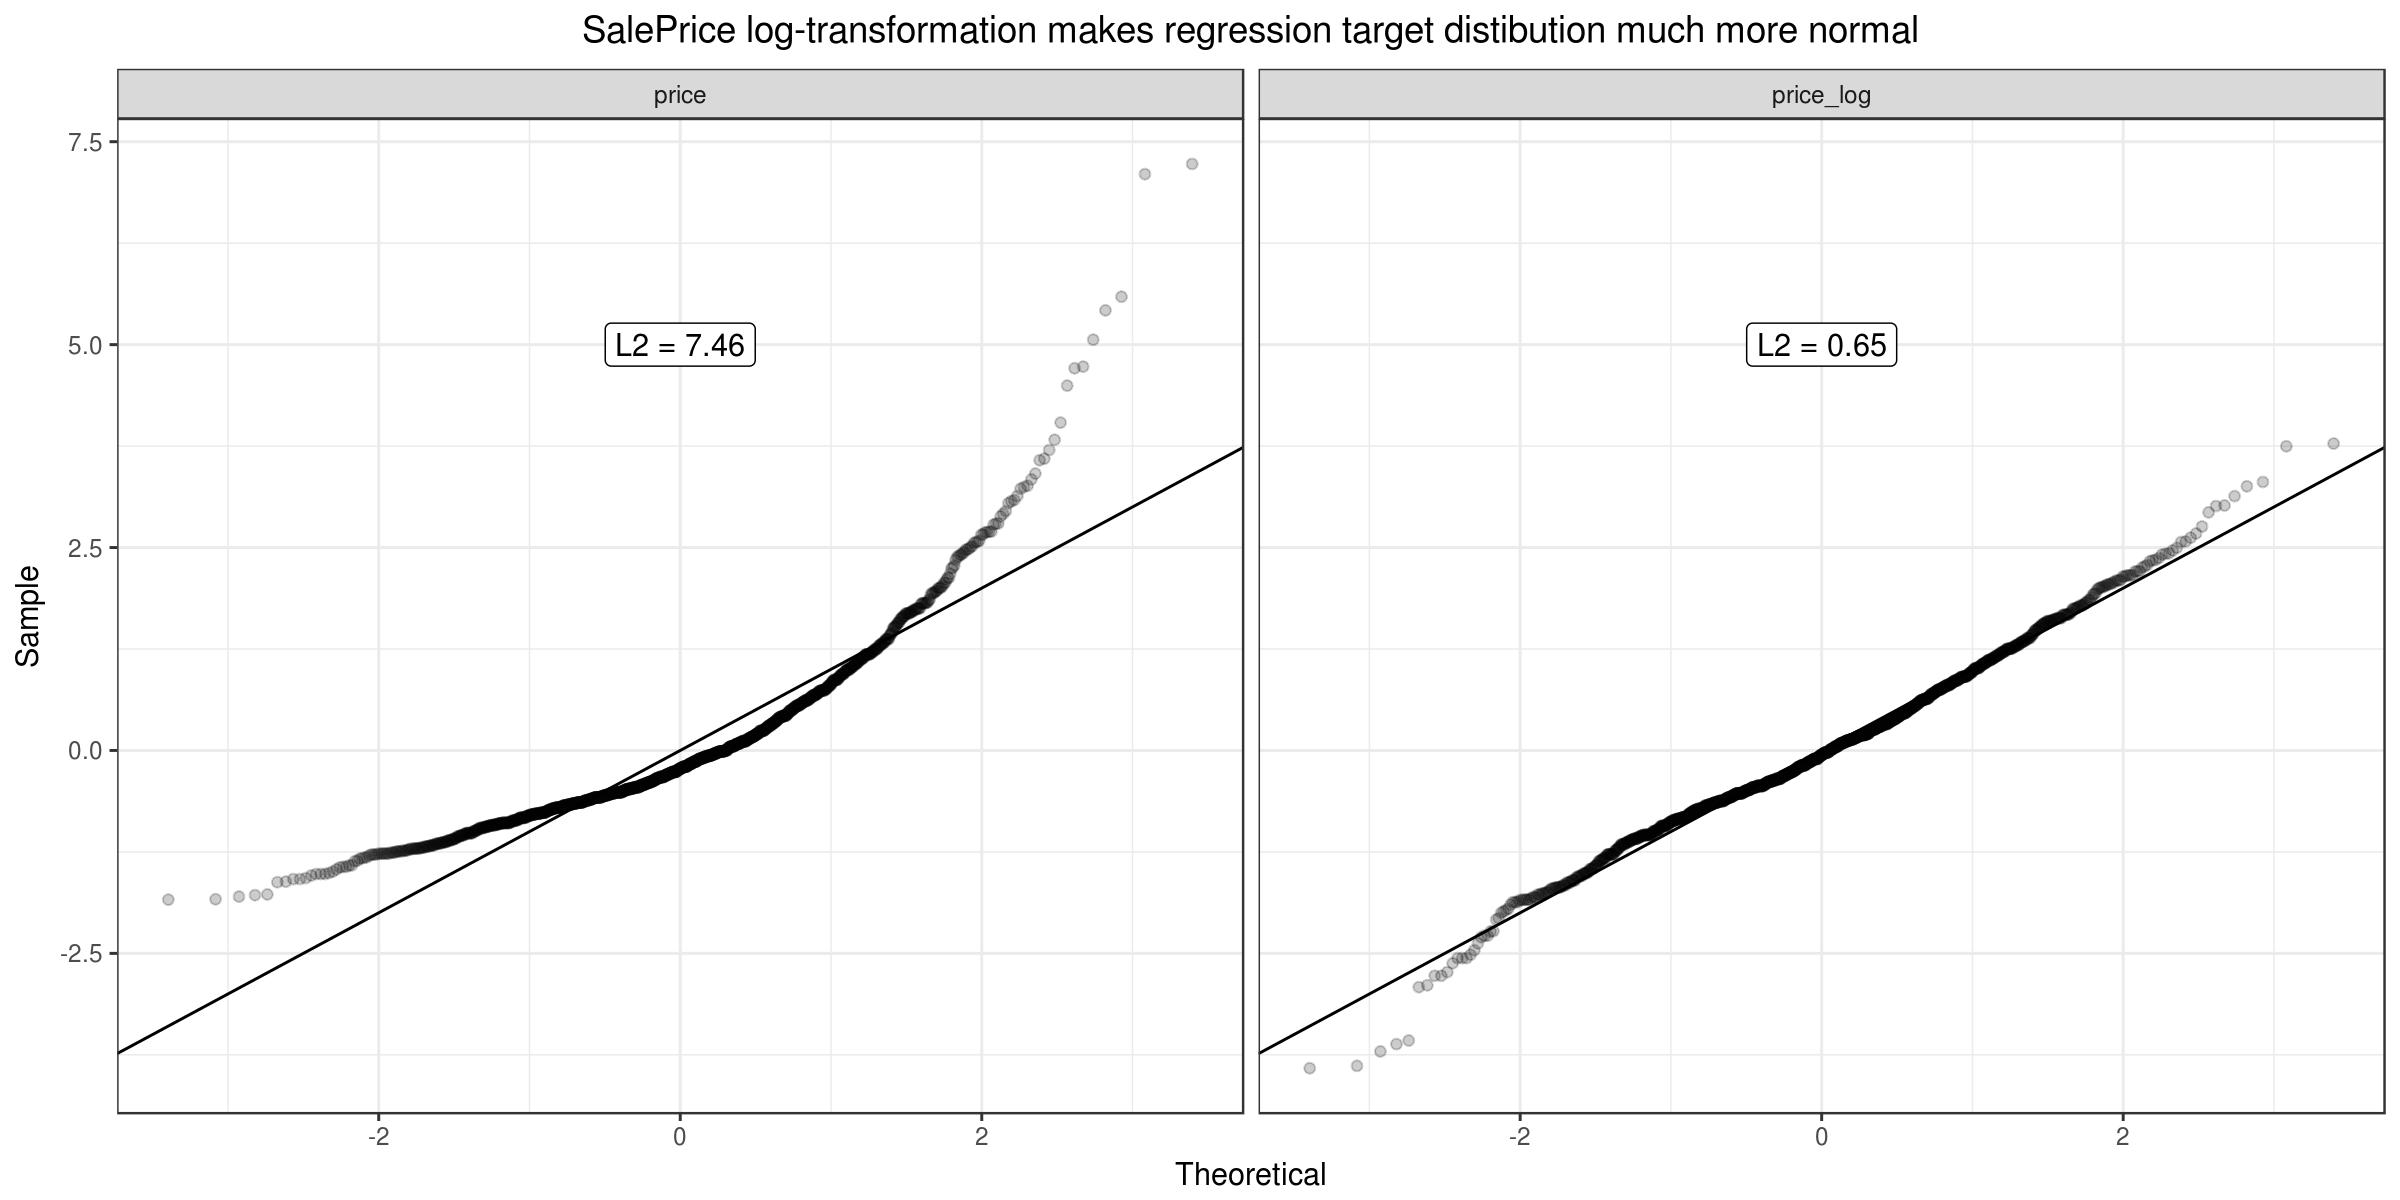

In [185]:
target_normal_paper <-
    combinedData %>% 
    select(price=SalePrice) %>% 
    na.omit %>%
    mutate(
        price_log = log(price)
    ) %>%
    gather(var, value) %>%
    group_by(var) %>%
    mutate(
        normed_value = (value - mean(value)) / sd(value)
    )

# Deviation from theoretical normal distribution in terms of L2 norm
L2_labels <-
    target_normal_paper %>%
    group_by(var, normed_value) %>%
    arrange(var, normed_value) %>%
    summarise(
        k = n()
    ) %>%
    mutate(
        empirical = cumsum(k) / sum(k),
        theoretical = pnorm(normed_value),
        L2_delta = k*(empirical - theoretical)**2
    ) %>% 
    group_by(var) %>%
    summarise(
        L2 = round(sum(L2_delta), 2)
    ) %>% 
    mutate(x=0, y=5, lab=paste0('L2 = ', L2))

           
show_table(
    target_normal_paper %>% arrange(var, value) %>% top_n(1, value), 
    L2    
)


`@@@`(12, 6, 200)
target_normal_paper %>%
ggplot() +
geom_qq(aes(sample=normed_value), alpha=0.2) +
facet_wrap(~var, ncol=2) +
geom_abline(slope=1) +
theme_bw() +
theme(legend.position="bottom", plot.title = element_text(hjust = 0.5)) +
ylab("Sample") + xlab("Theoretical") +
labs(
    title = "SalePrice log-transformation makes regression target distibution much more normal"
) +
geom_text(aes(x, y, label=lab), data=L2_labels) + 
geom_label(aes(x, y, label=lab), data=L2_labels)

# Entropy of attribute distributions

Zero entropy means constant distibution of a factor and thus it's zero predictive power. So maybe entropy means something... or not.

var,entropy,type
TotalBsmtSF,9.348757,Numeric
BsmtUnfSF,9.390885,Numeric
X1stFlrSF,9.601608,Numeric
GrLivArea,9.882939,Numeric
LotArea,10.400602,Numeric
var,entropy,type
Utilities,0.01262749,Categorical
PoolQC,0.03820308,Categorical
Street,0.03850369,Categorical
PoolArea,0.05767714,Numeric


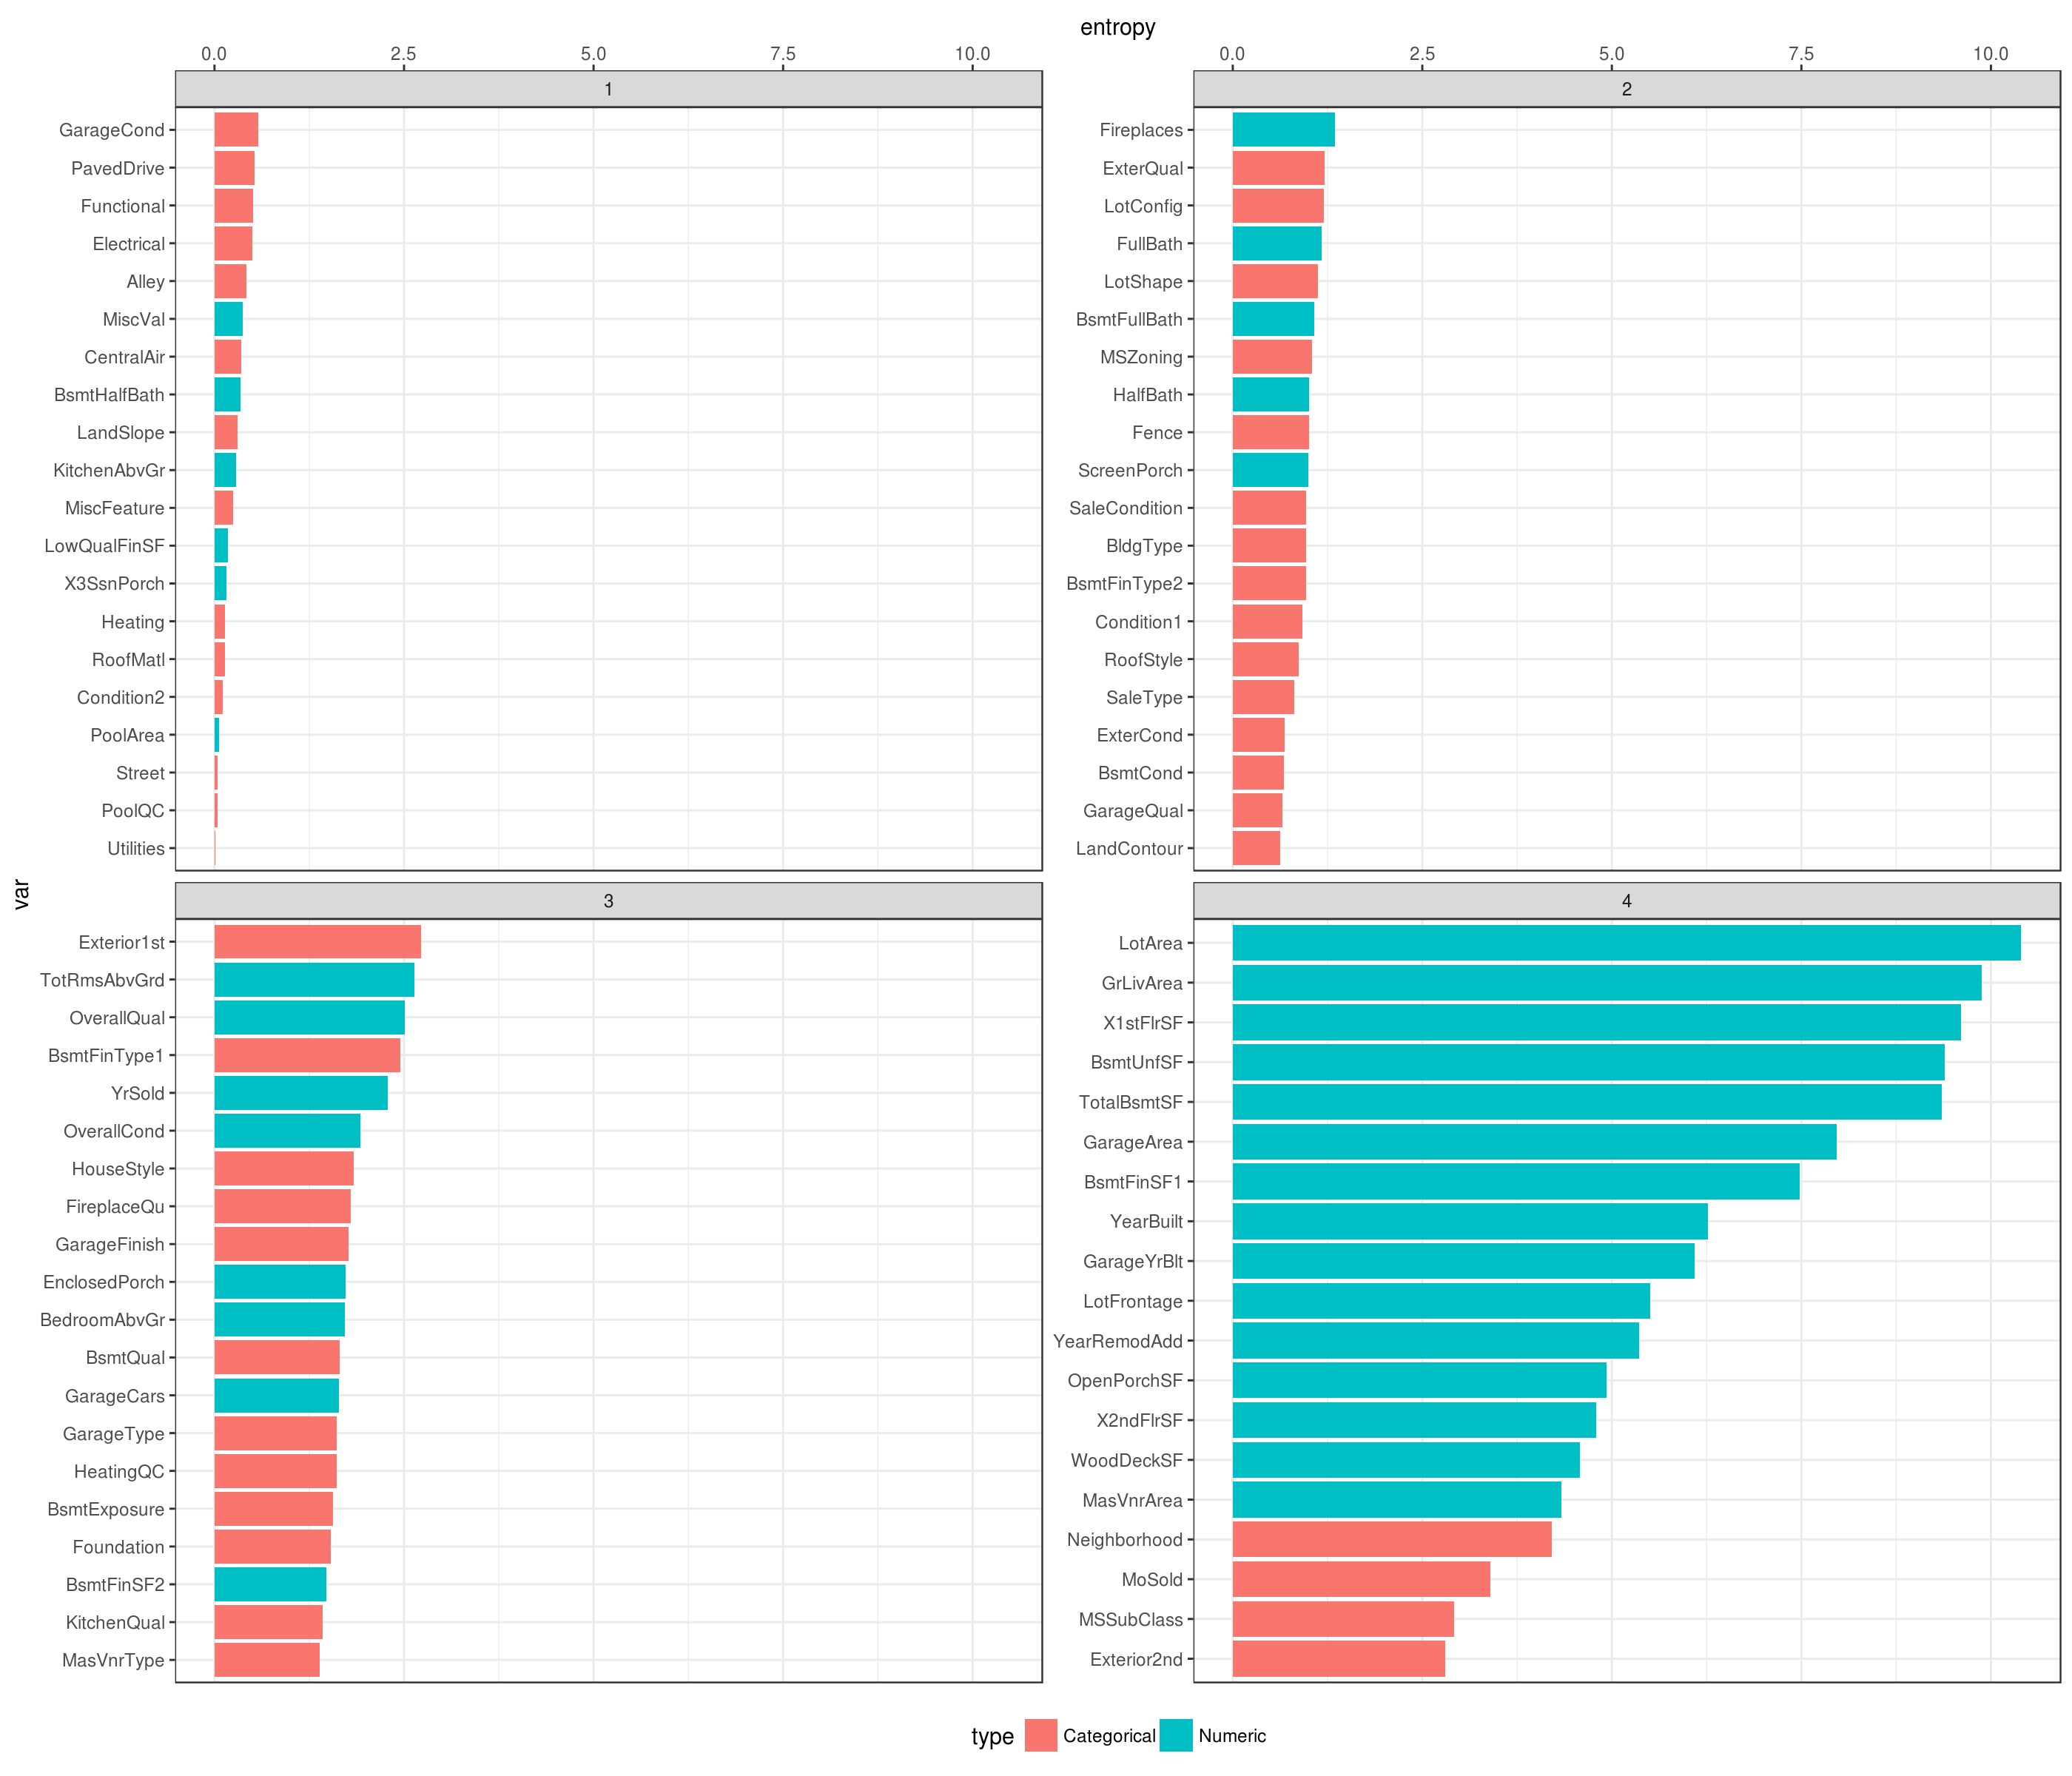

In [190]:
predictorsByEntropy <- attr_sel$entropy$arrange_vars(
    combinedData %>% select(-SalePrice, -Id, -dataSource)
) %>%
mutate(
    is_numeric = var %in% house_prices$helpers$get_numeric_colnames(combined_dataset),
    type = ifelse(is_numeric, "Numeric", "Categorical")
) %>%
select(-is_numeric)

show_table(
    list(predictorsByEntropy %>% tail(5), "Large entropy"),
    list(predictorsByEntropy %>% head(5), "Small entropy")
)

`@@@`(14, 12, 200)
predictorsByEntropy %>%
mutate(
    var = factor(var, levels=var),
    basket = floor(4*(row_number() - 1)/nrow(.)) + 1
) %>%
ggplot(aes(x=var, y=entropy, fill=type)) +
geom_bar(stat="identity") +
facet_wrap(~basket, nrow = 2, ncol = 2, scales="free_y") +
coord_flip() +
scale_y_continuous(position = "top") +
theme_bw() +
theme(legend.position = "bottom")

# Separation between groups
##### Aplies only to categorical predictors. Variation on ANOVA theme.
This is custom measure of how levels of categorical variables are separated between each other relative to sale price. The bigger is the separation the more should be variable meaningful for the price prediction. If there is no separation between levels of a given variable then this variable is useless.

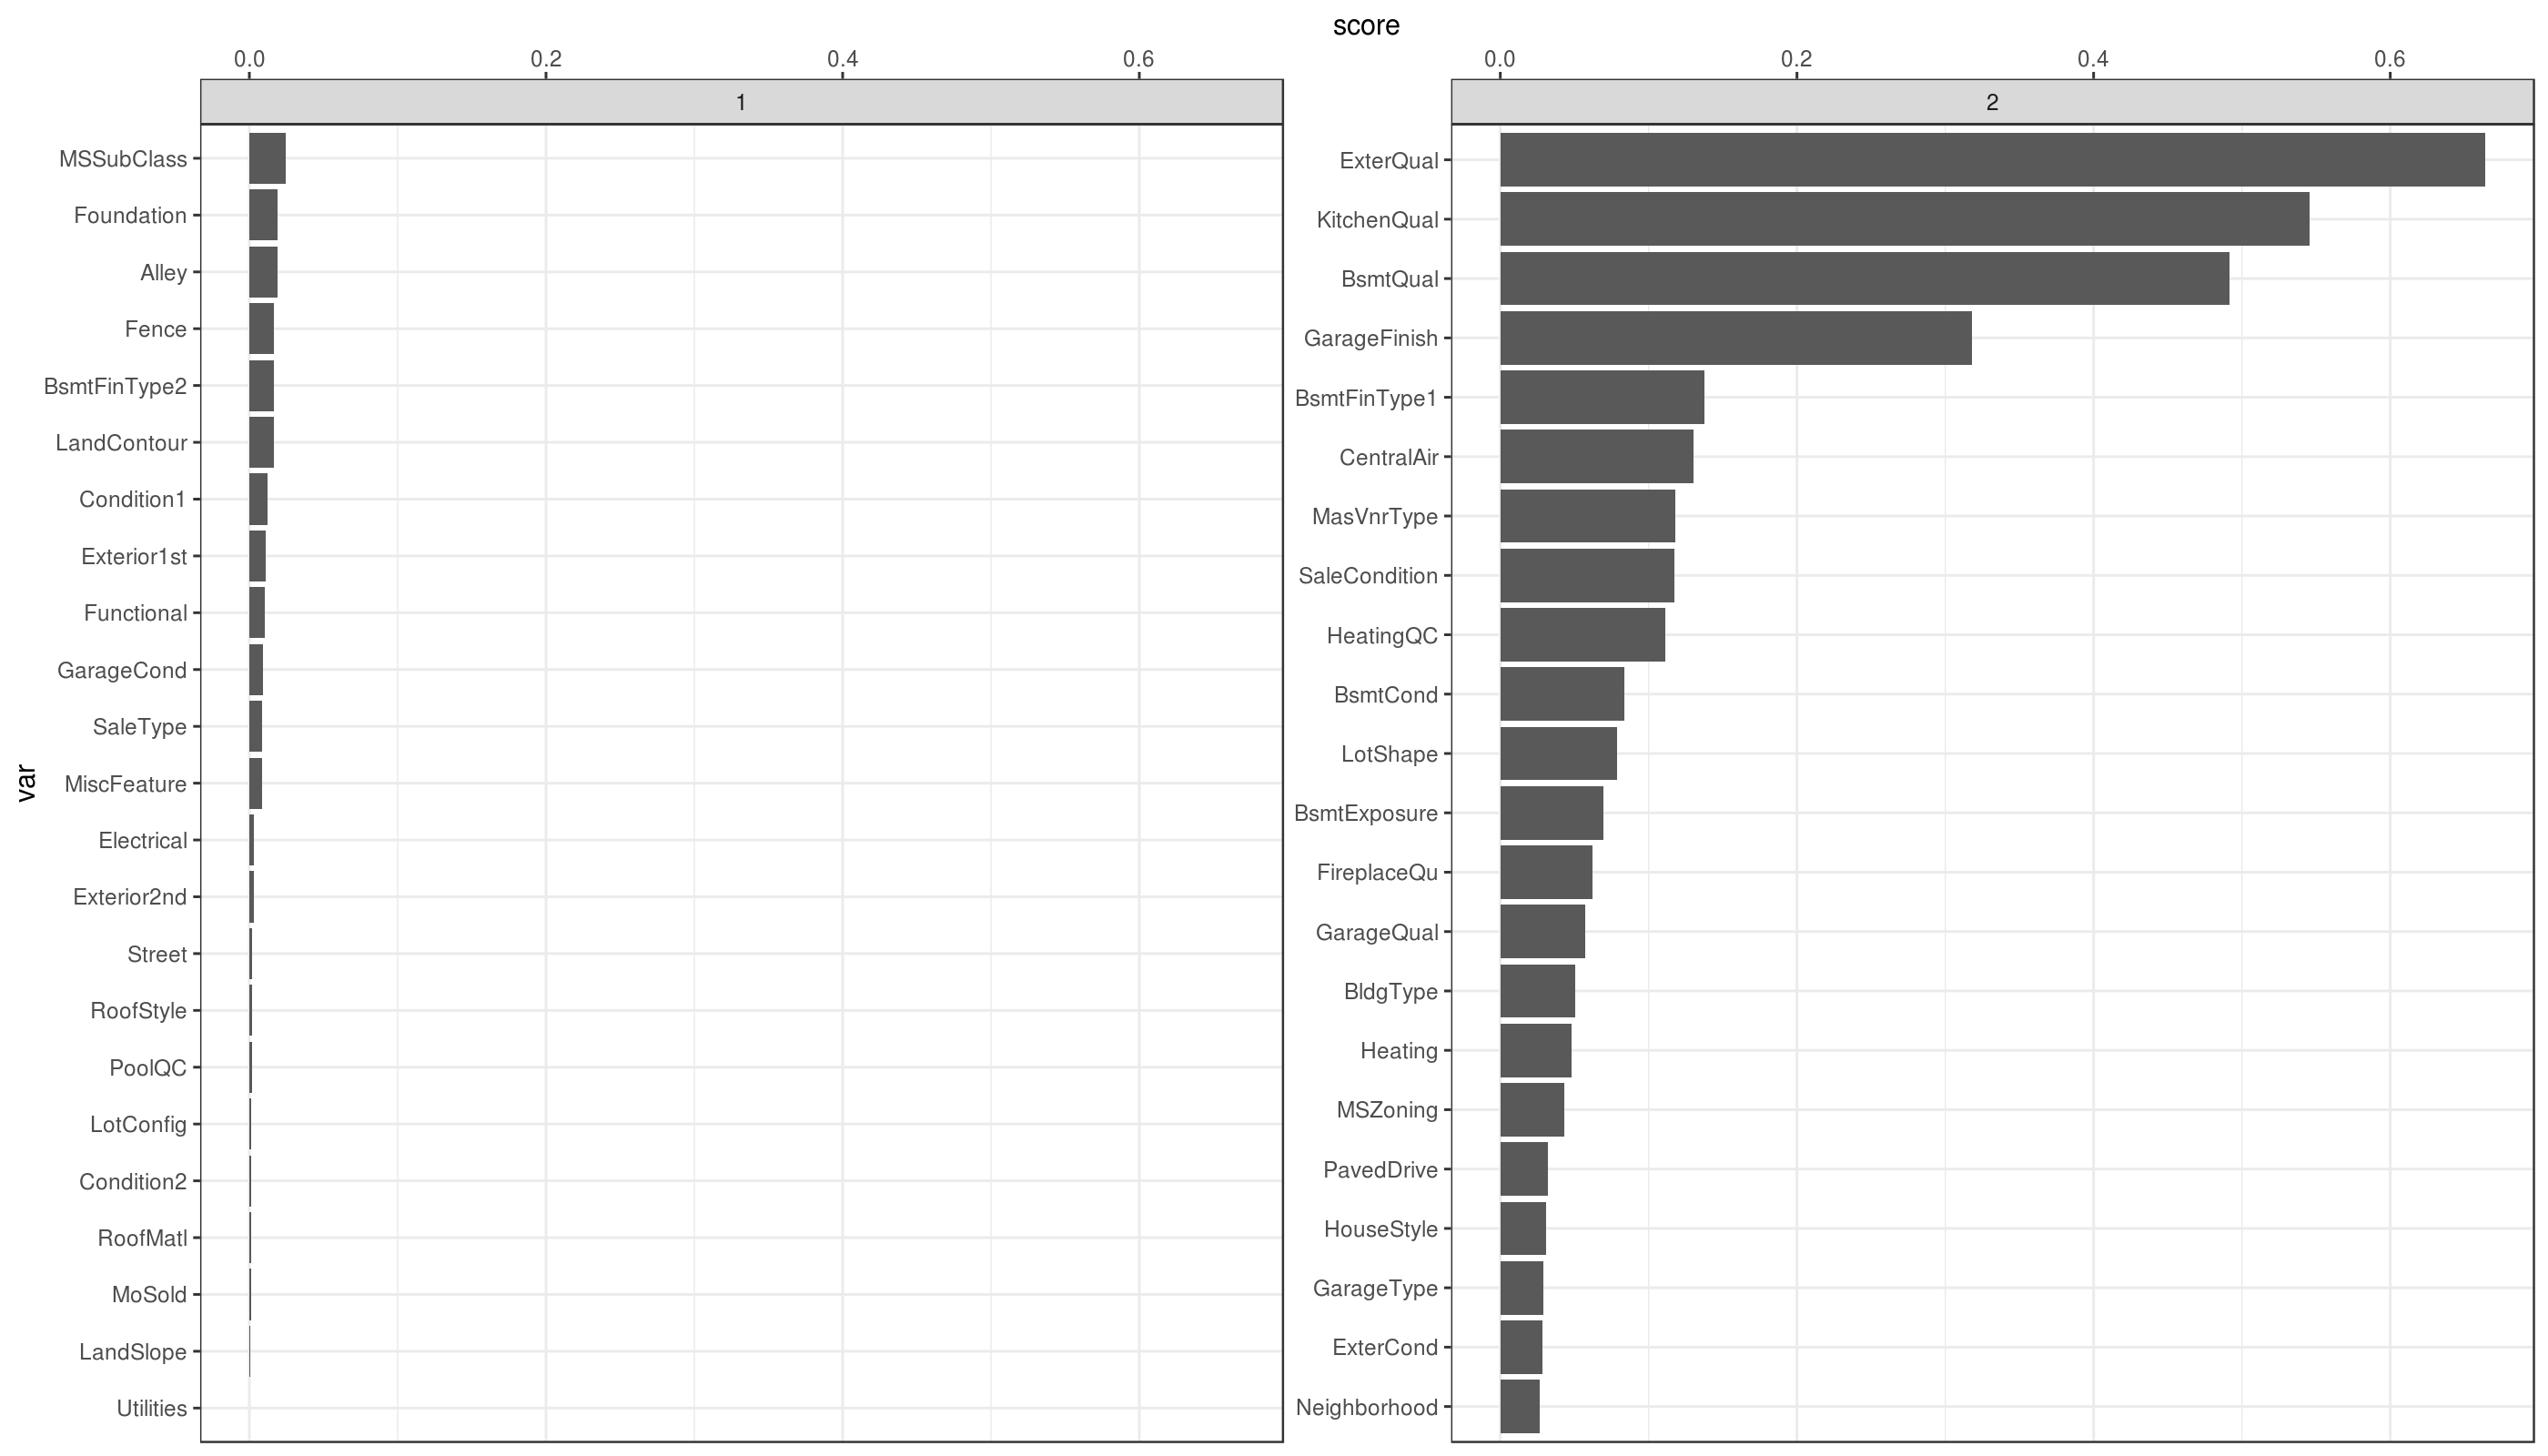

In [194]:
predictorsBySeparation <- attr_sel$groups_separation$arrange_vars(
    df = categData %>% mutate(price_log = log(SalePrice)) %>% select(-SalePrice),
    target_var = price_log
) %>% mutate(type = "Categorical")

`@@@`(14, 8, 200)
predictorsBySeparation %>%
mutate(
    var = factor(var, levels=var),
    basket = floor(2*(row_number() - 1)/nrow(.)) + 1
) %>%
ggplot(aes(x=var, y=score)) +
geom_bar(stat="identity") +
facet_wrap(~basket, nrow = 1, ncol = 2, scales="free_y") +
coord_flip() +
scale_y_continuous(position = "top") +
theme_bw() +
theme(legend.position = "bottom")

### Visualising separation with two opposite test cases

In [195]:
# Helper function that orderes factor levels by SalePrice's mean value at that level.
# Otherwise ggplot will by default order levels lexicographically.

order_factor_by_target <- attr_sel$order_factor_by_target

order_factor_by_target(
    df = categData %>% filter(!is.na(SalePrice)) %>% select(ExterQual, SalePrice), 
    factor_var = ExterQual, 
    target_var = SalePrice
)$ExterQual %>% levels %>% show_list

Fa TA Gd Ex

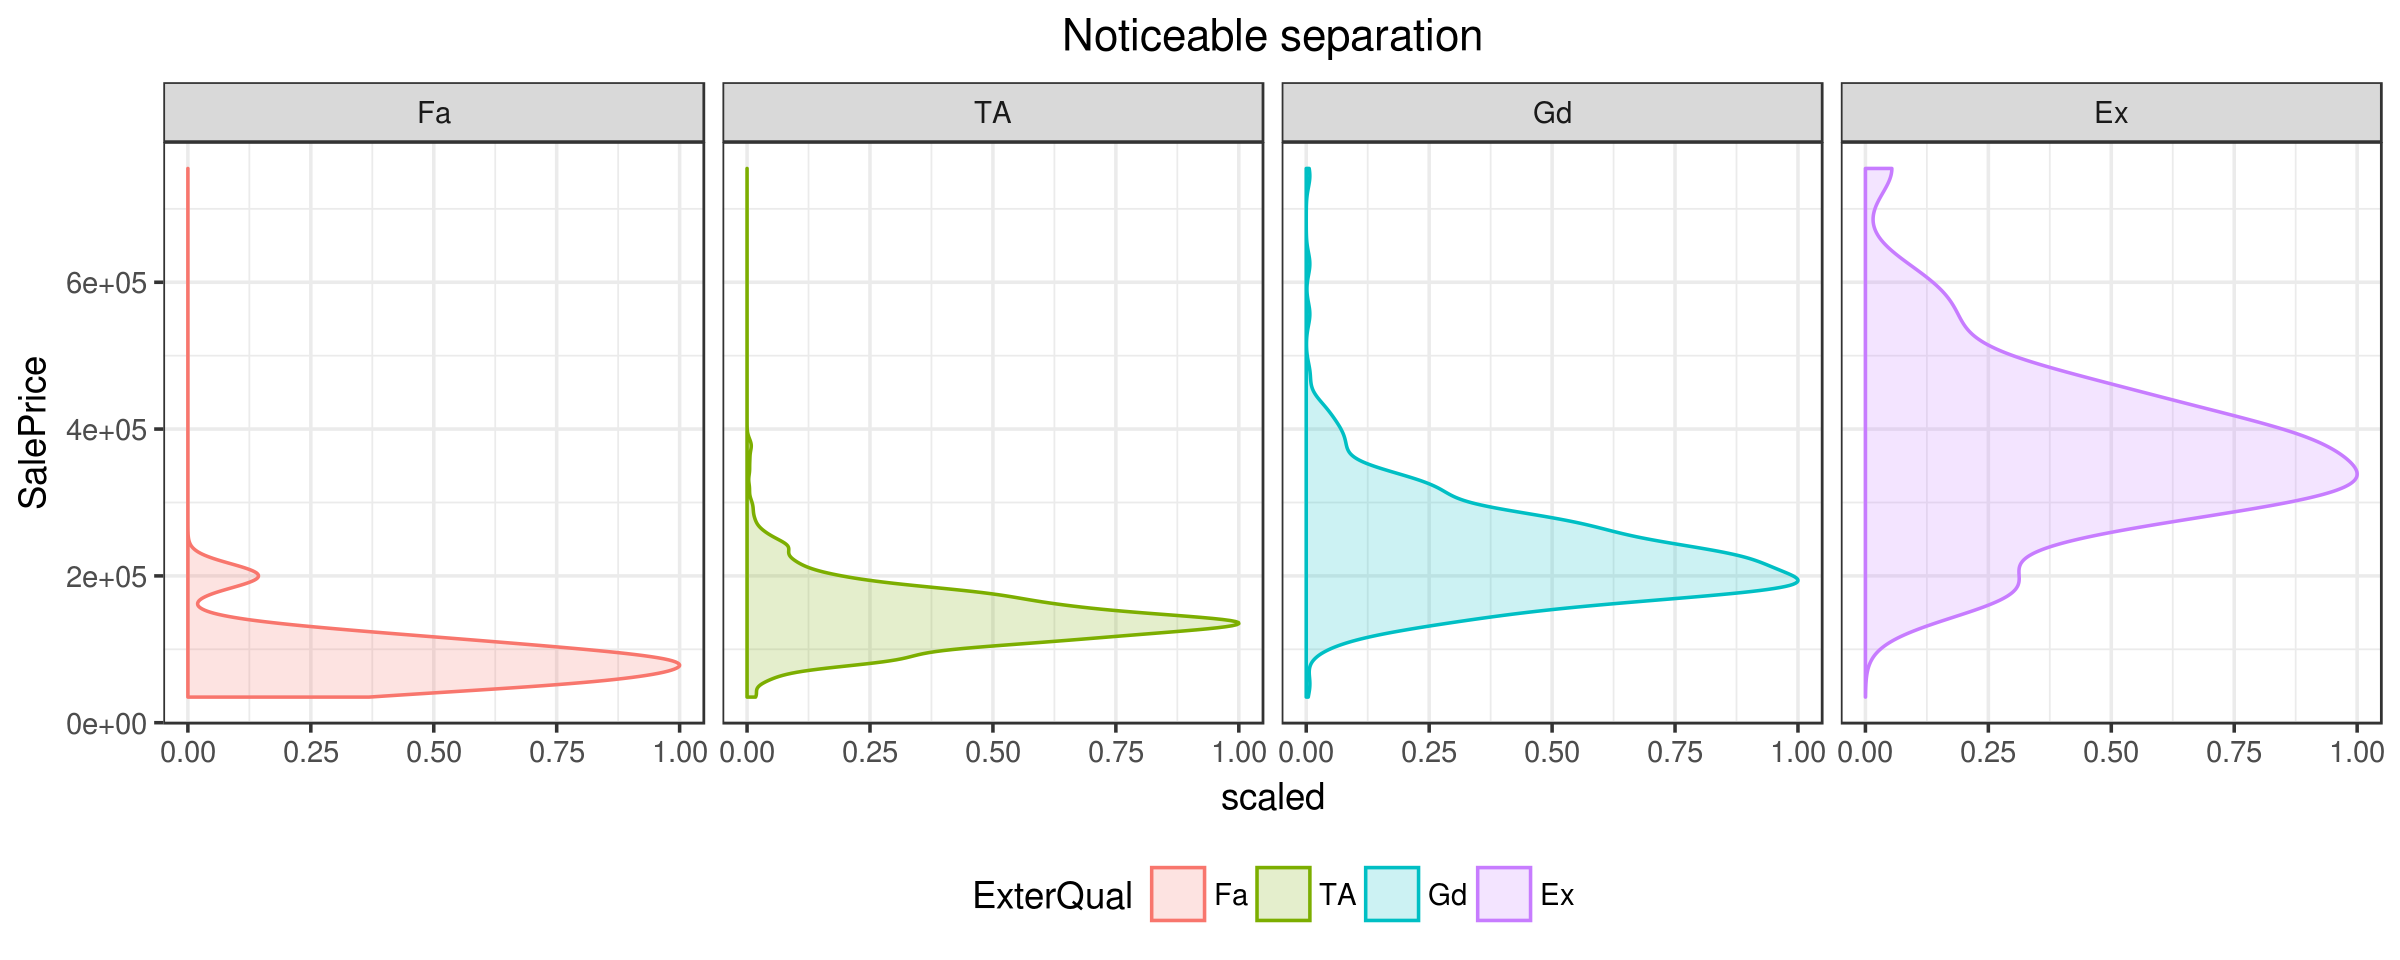

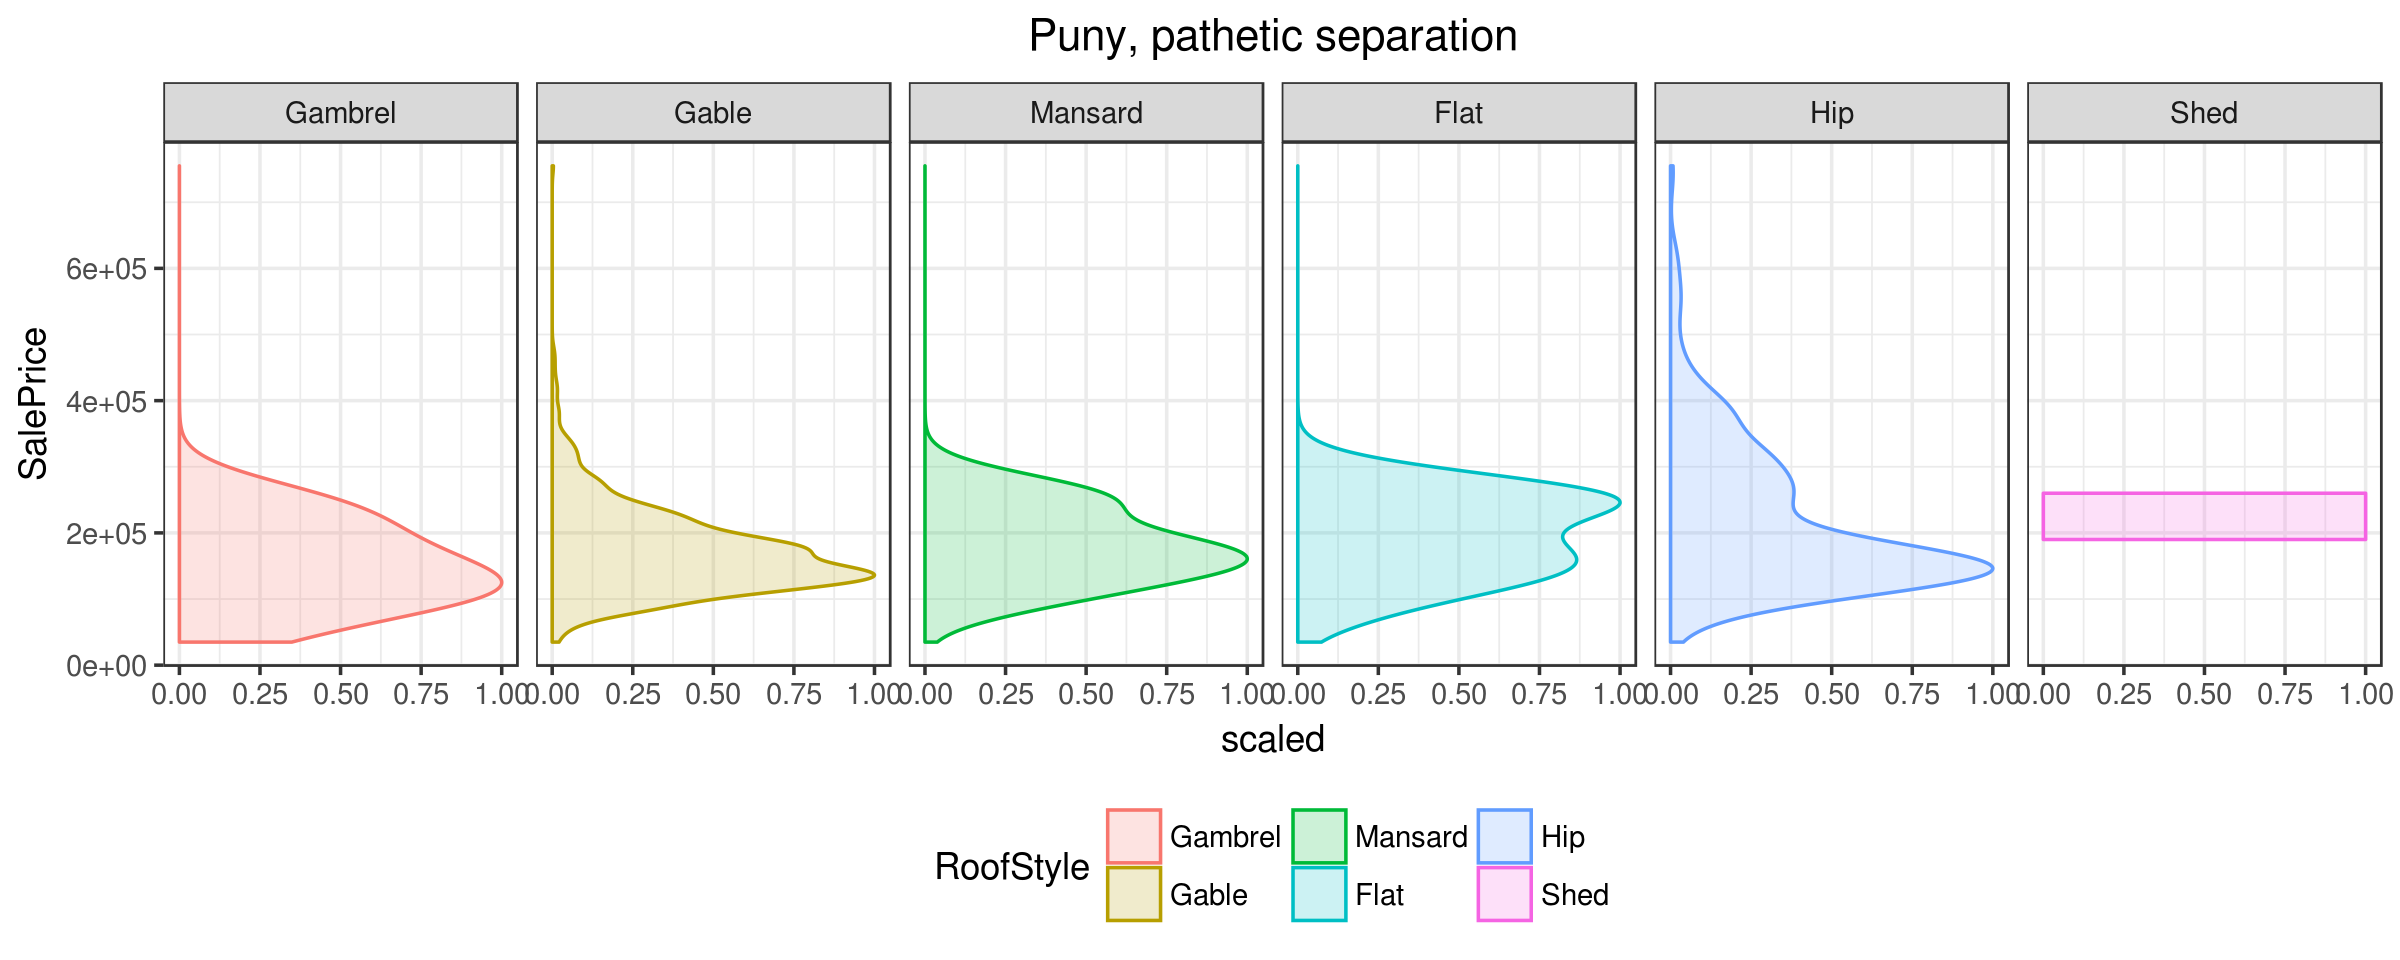

In [196]:
`@@@`(10, 4, 240)

order_factor_by_target(
    df = categData %>% filter(!is.na(SalePrice)) %>% select(ExterQual, SalePrice), 
    factor_var = ExterQual, 
    target_var = SalePrice
) %>%
ggplot(aes(SalePrice, color=ExterQual)) +
geom_density(aes(y=..scaled.., fill=ExterQual), alpha=.2) +
facet_wrap(~ExterQual, nrow=1) +
coord_flip() +
theme_bw() +
theme(legend.position="bottom", plot.title = element_text(hjust = 0.5)) +
labs(title = "Noticeable separation")

order_factor_by_target(
    df = categData %>% filter(!is.na(SalePrice)) %>% select(RoofStyle, SalePrice), 
    factor_var = RoofStyle, 
    target_var = SalePrice
) %>%
ggplot(aes(SalePrice, color=RoofStyle)) +
geom_density(aes(y=..scaled.., fill=RoofStyle), alpha=.2) +
facet_wrap(~RoofStyle, nrow=1) +
coord_flip() +
theme_bw() +
theme(legend.position="bottom", plot.title = element_text(hjust = 0.5)) +
labs(title = "Puny, pathetic separation")

### Ordering factors by $R^2$ of $log(SalePrice) \sim factor$

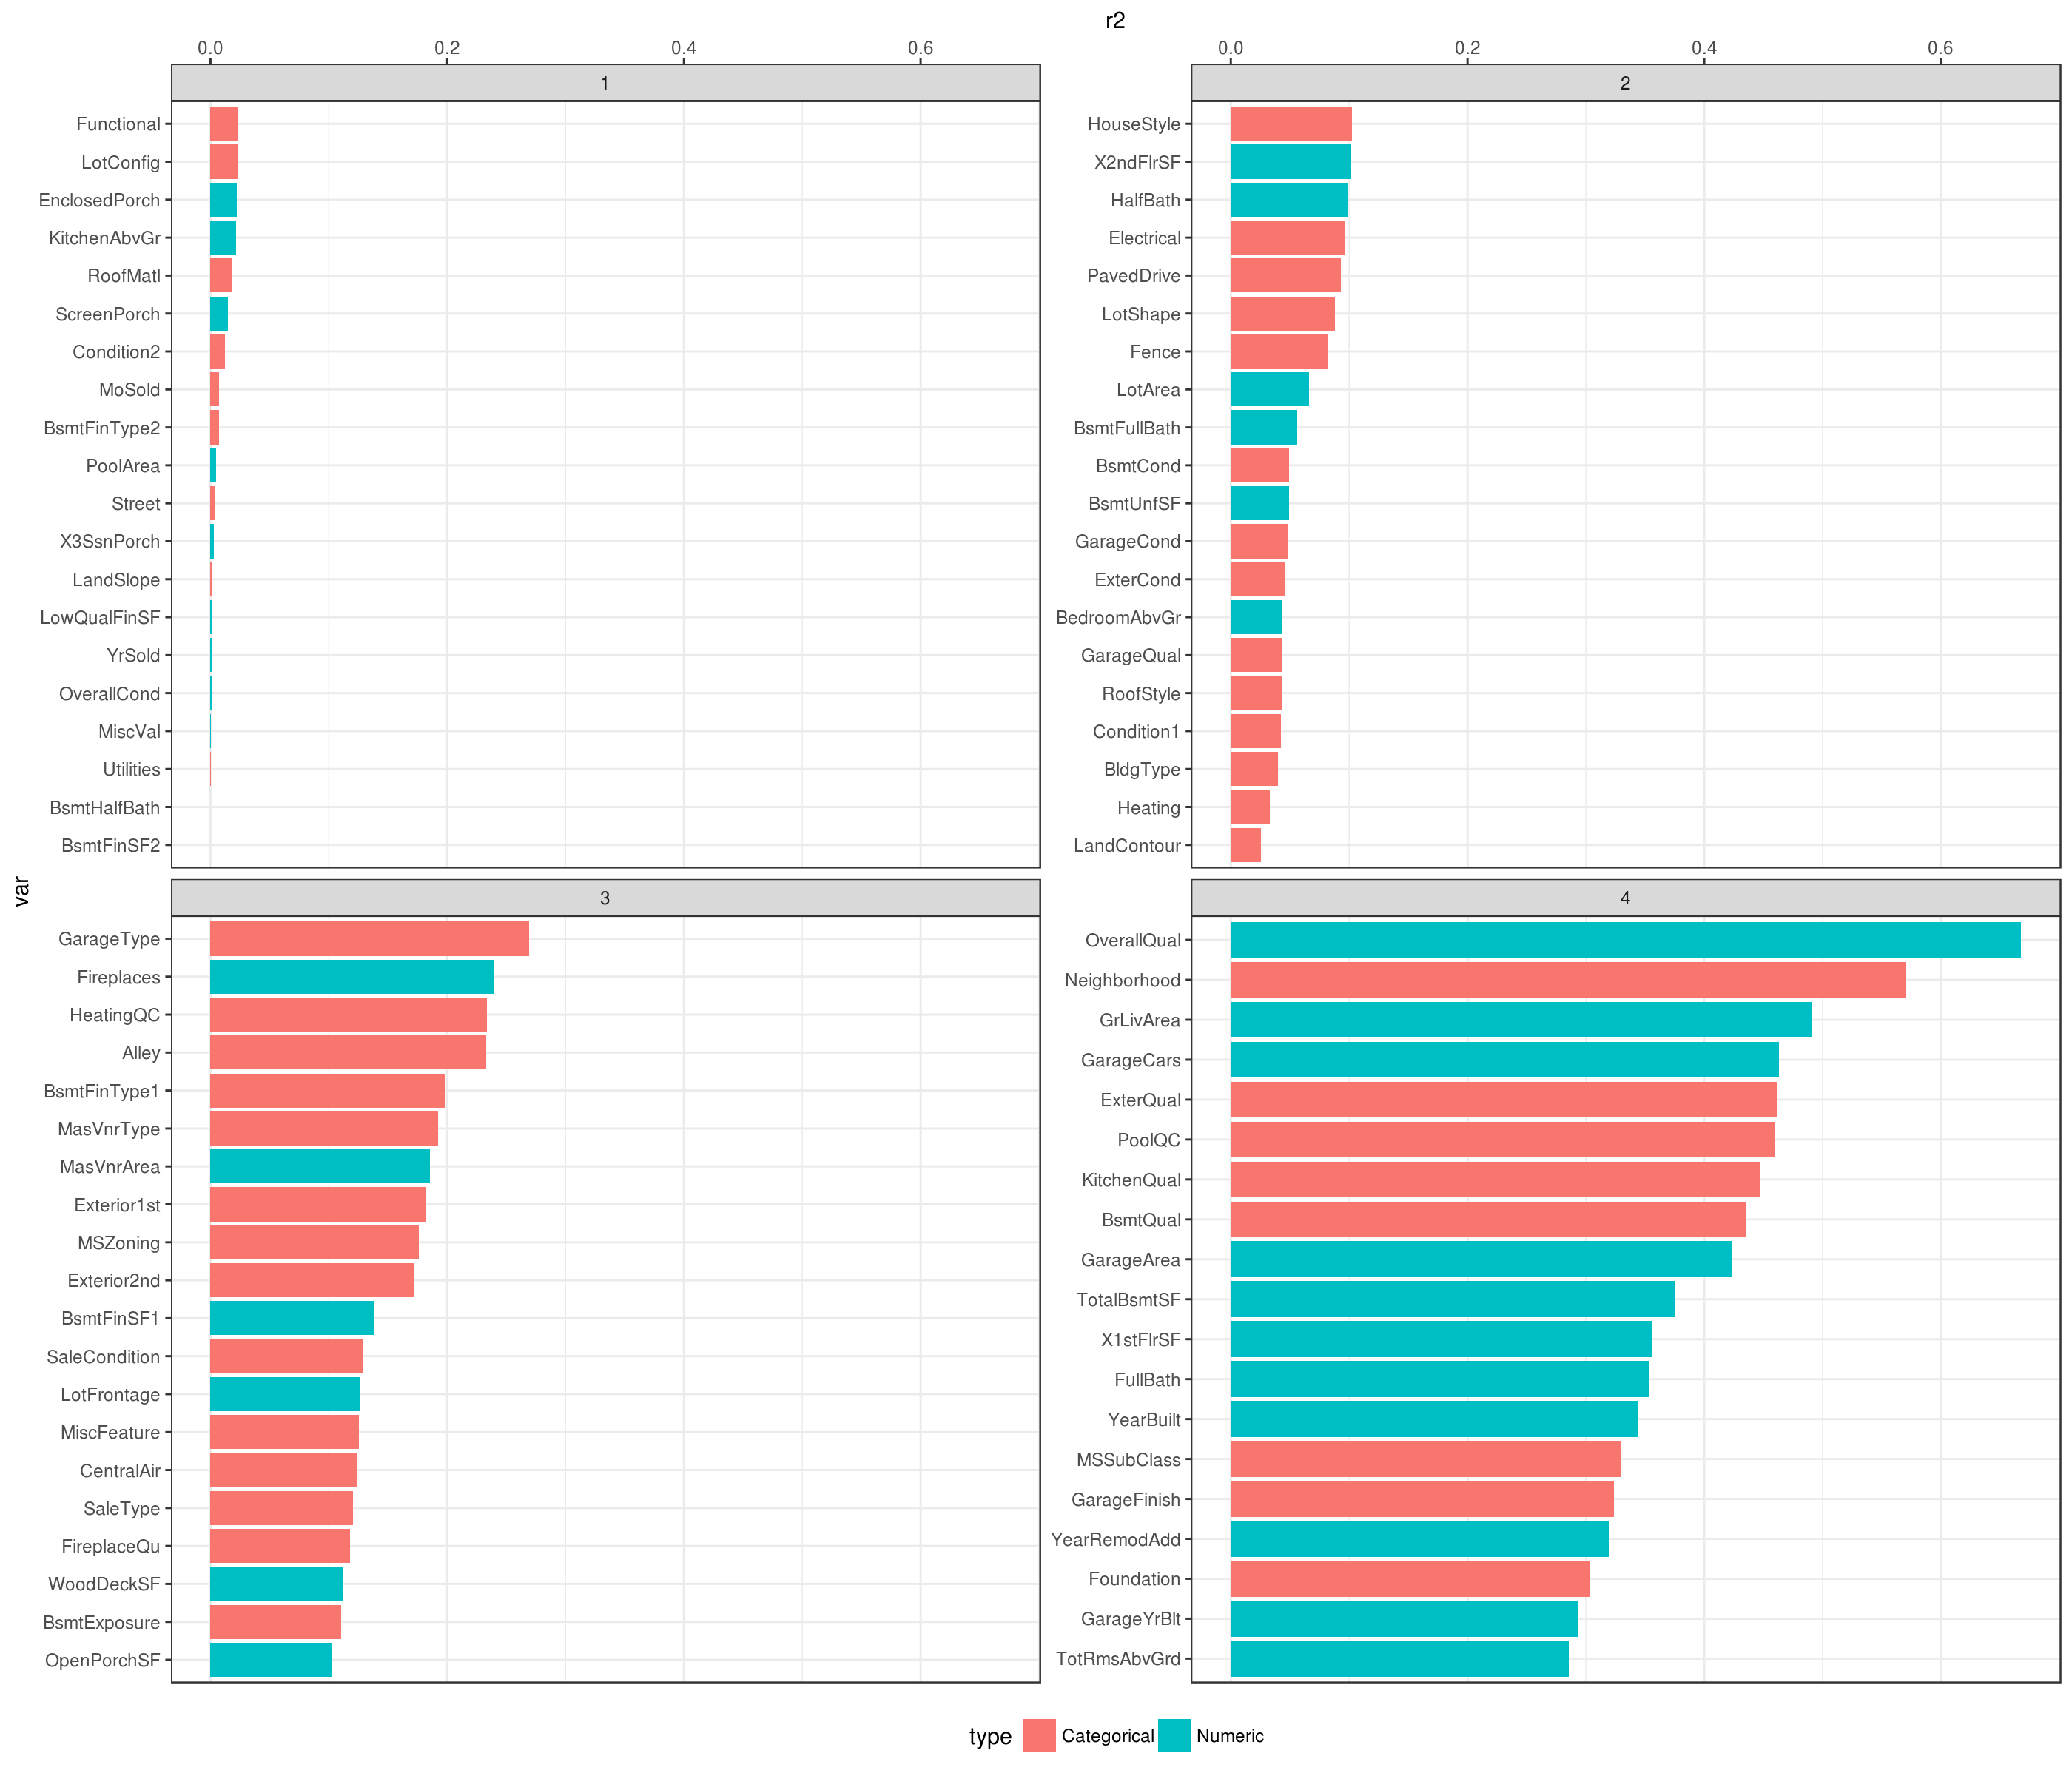

In [201]:
categ_vars_by_r2 <- 
    attr_sel$Rsquared$arrange_vars(
        df = categData %>% mutate(price_log = log(SalePrice)) %>% select(-SalePrice), 
        target_var = price_log
    )

numeric_vars_by_r2 <- 
    attr_sel$Rsquared$arrange_vars(
        df = numerData %>% mutate(price_log = log(SalePrice)) %>% select(-SalePrice), 
        target_var = price_log
    )

predictorsByR2 <- bind_rows(
    categ_vars_by_r2 %>% mutate(type = "Categorical"),
    numeric_vars_by_r2 %>% mutate(type = "Numeric")
) %>% arrange(r2)


`@@@`(14, 12, 200)
predictorsByR2 %>%
mutate(
    var = factor(var, levels=var),
    basket = floor(4*(row_number() - 1)/nrow(.)) + 1
) %>%
ggplot(aes(x=var, y=r2, fill=type)) +
geom_bar(stat="identity") +
facet_wrap(~basket, nrow = 2, ncol = 2, scales="free_y") +
coord_flip() +
scale_y_continuous(position = "top") +
theme_bw() +
theme(legend.position = "bottom")

# By Fisher statistics

#### Basically one-way ANOVA

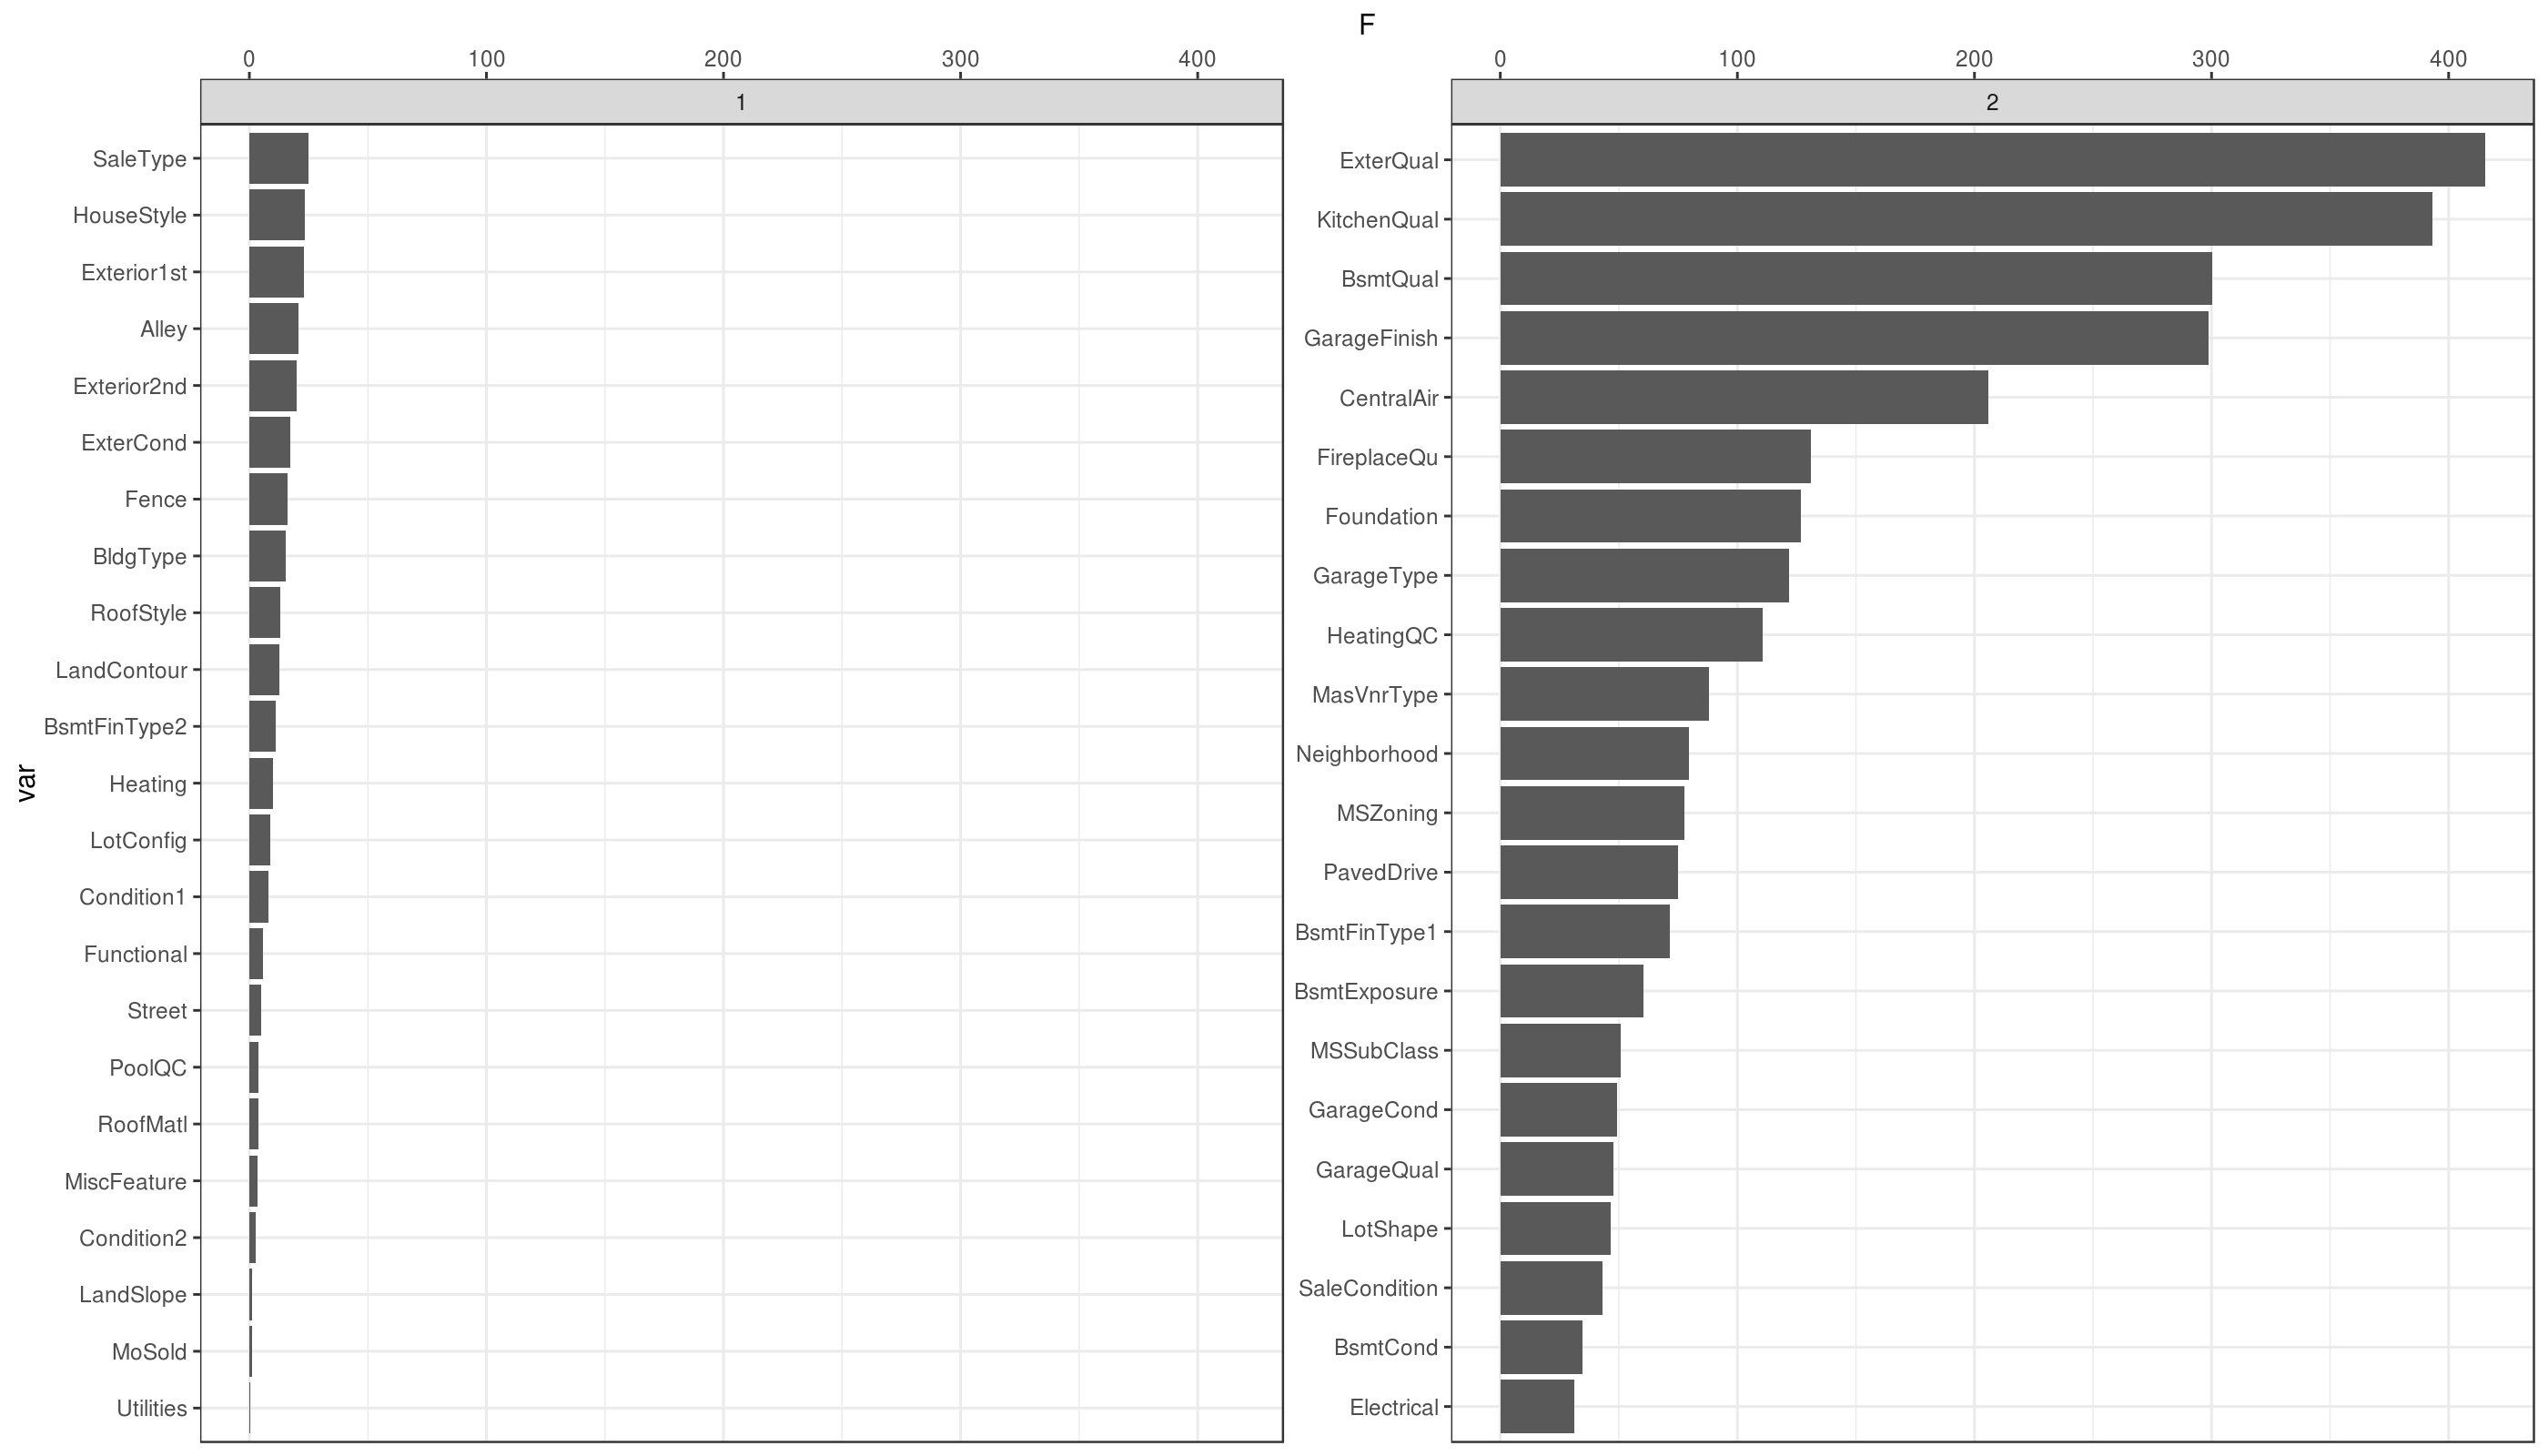

In [198]:
predictorsByFisher <- attr_sel$anova$arrange_vars(
    df = categ_data %>% mutate(price_log = log(SalePrice)) %>% select(-SalePrice), 
    target_var = price_log
) %>% mutate(type = "Categorical")

`@@@`(14, 8, 200)
predictorsByFisher %>%
mutate(
    var = factor(var, levels=var),
    basket = floor(2*(row_number() - 1)/nrow(.)) + 1
) %>%
ggplot(aes(x=var, y=F)) +
geom_bar(stat="identity") +
facet_wrap(~basket, nrow = 1, ncol = 2, scales="free_y") +
coord_flip() +
scale_y_continuous(position = "top") +
theme_bw() +
theme(legend.position = "bottom")

# Everything together

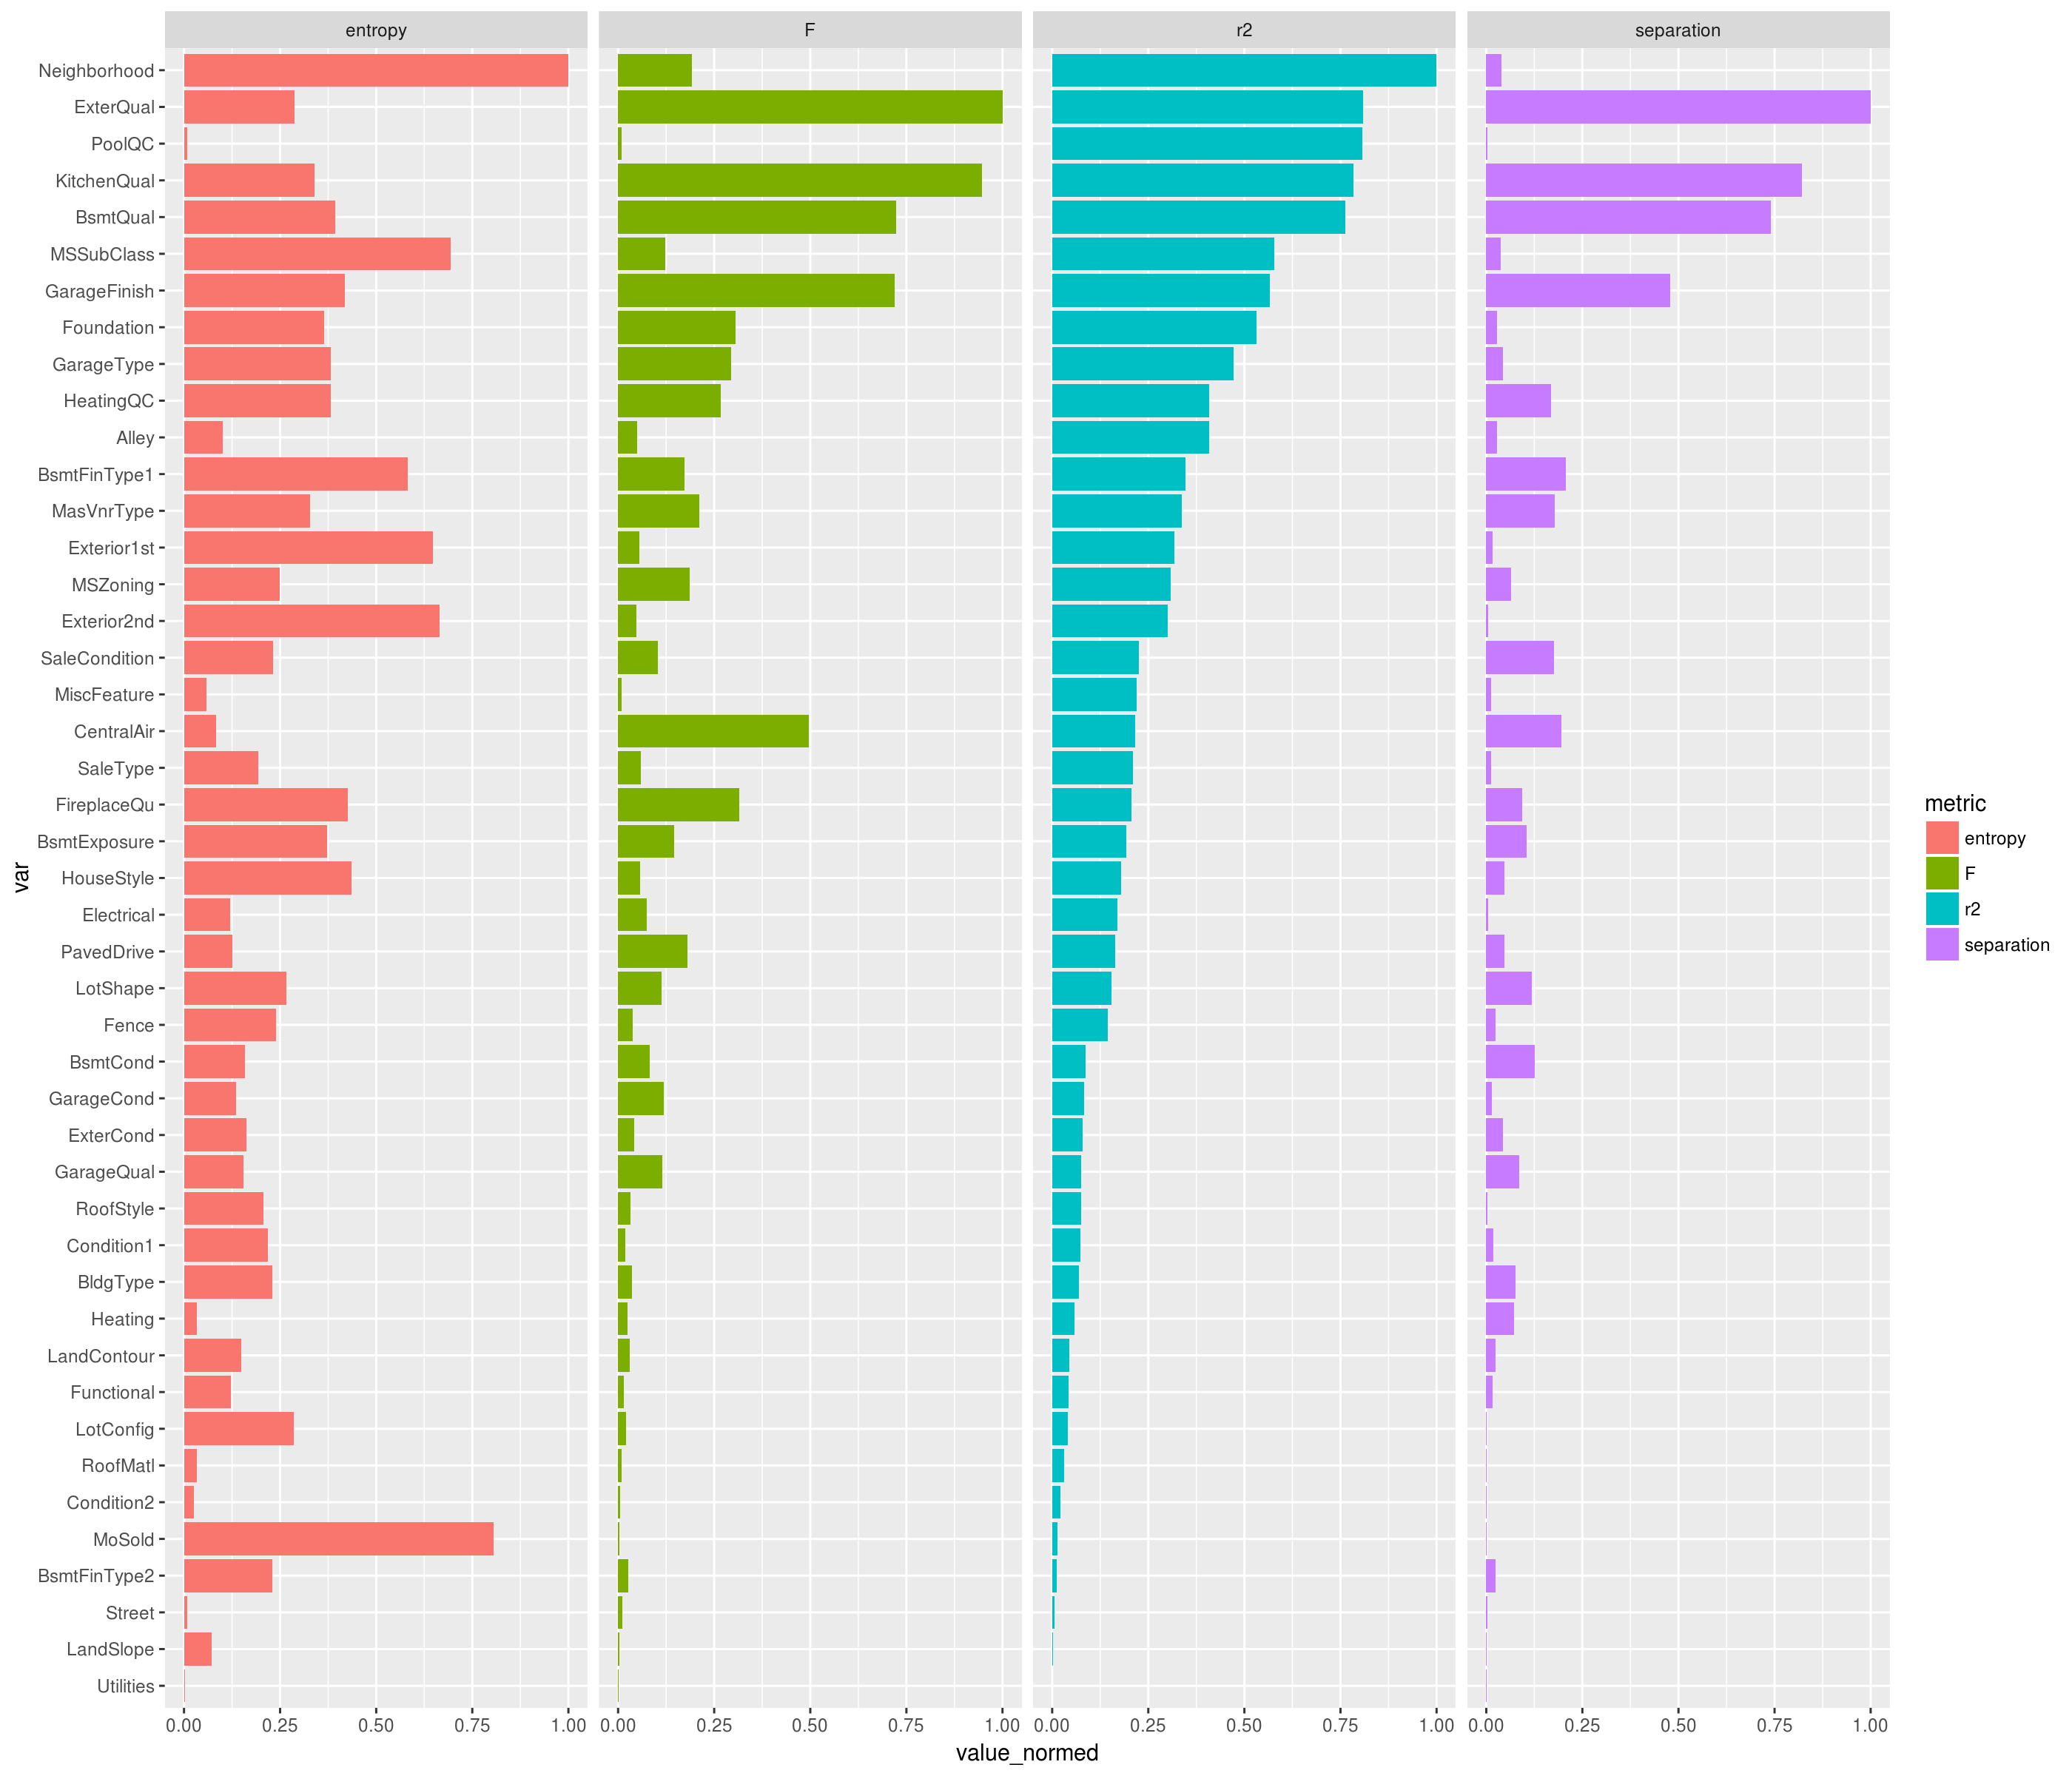

In [292]:
df <-
    bind_rows(
        predictorsByEntropy %>% gather(metric, value, -var, -type),
        predictorsBySeparation %>% rename(separation=score) %>% gather(metric, value, -var, -type),
        predictorsByR2 %>% gather(metric, value, -var, -type),
        predictorsByFisher %>% gather(metric, value, -var, -type)
    ) %>% 
    group_by(type, metric) %>%
    mutate(value_normed = value / max(value)) %>%
    ungroup %>%
    arrange(type, metric, value_normed)


df_cat <-
    df %>% 
    filter(type == "Categorical") %>%
    select(-type, -value) %>%
    spread(metric, value_normed)

df_cat <-
    df_cat %>%
    mutate(
        var = factor(var, levels = df_cat %>% select(var, r2) %>% arrange(r2) %>% `[[`(1))
    ) %>%
    gather(metric, value_normed, -var)


`@@@`(14, 12, 200)
df_cat %>%
ggplot(aes(x=var, y=value_normed, fill=metric)) +
geom_bar(stat="identity") +
coord_flip() +
facet_wrap(~metric, nrow = 1)

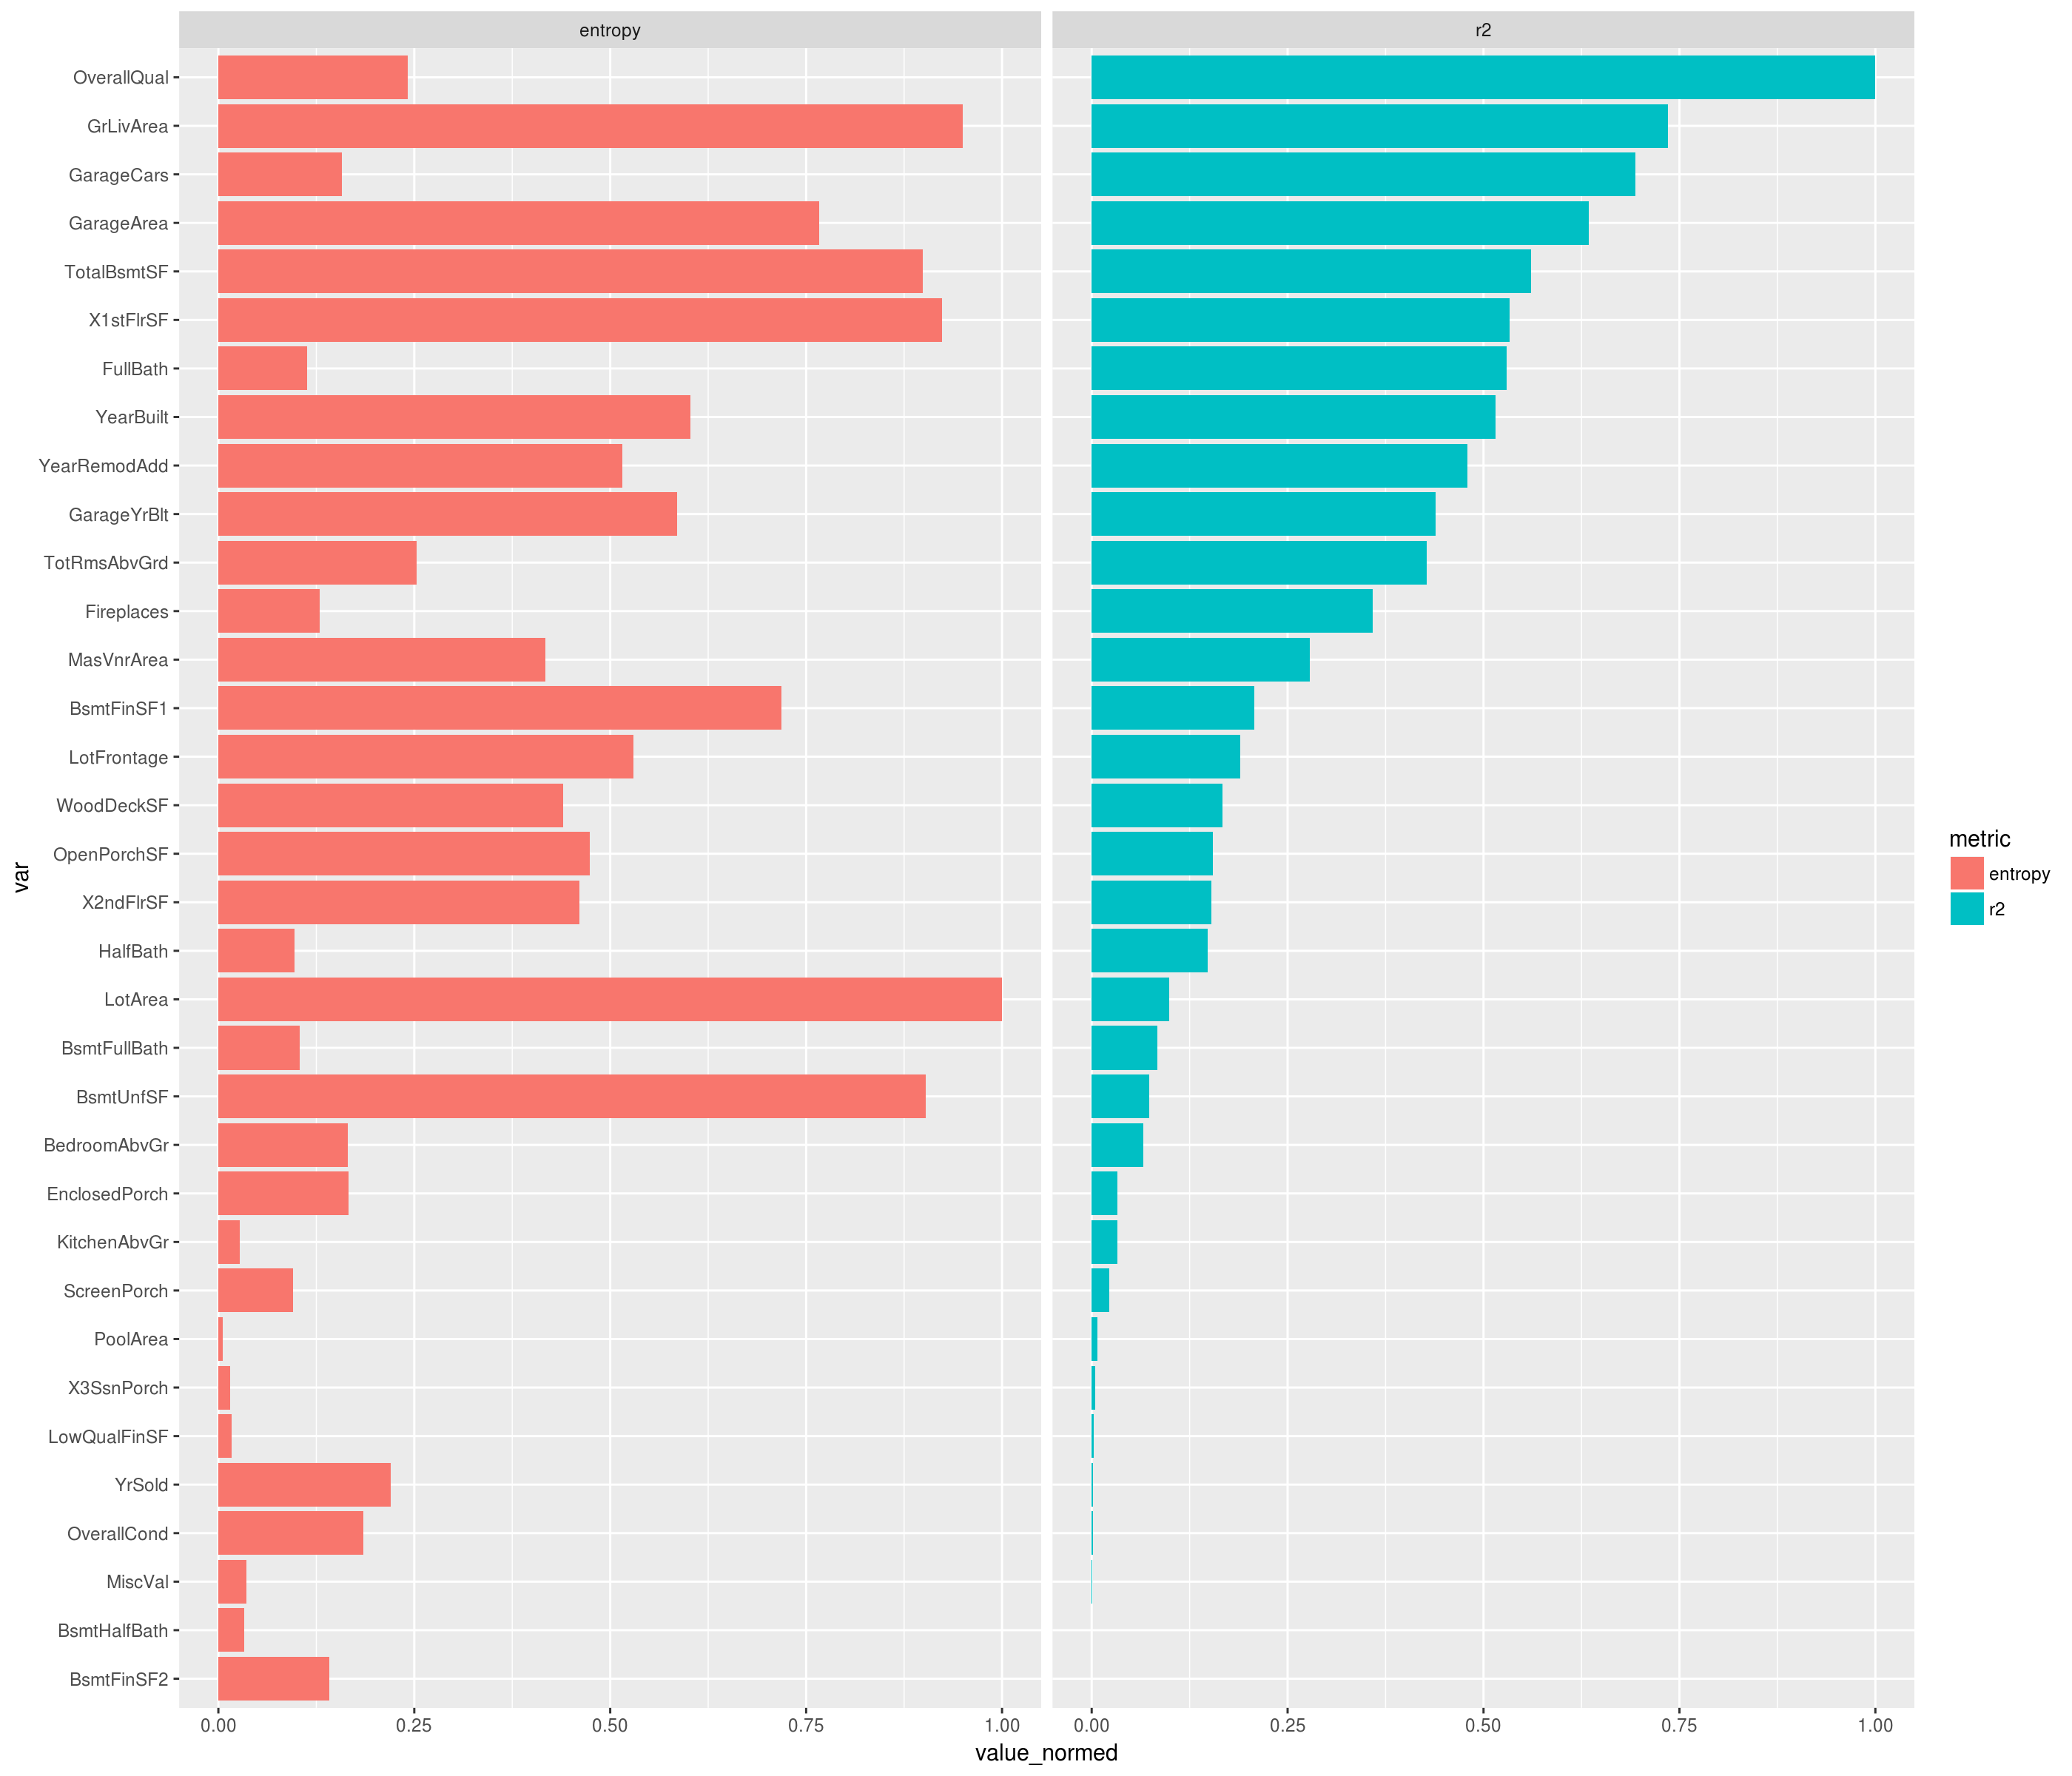

In [296]:
df_num <-
    df %>% 
    filter(type == "Numeric") %>%
    select(-type, -value) %>%
    spread(metric, value_normed)

df_num <-
    df_num %>%
    mutate(
        var = factor(var, levels = df_num %>% select(var, r2) %>% arrange(r2) %>% `[[`(1))
    ) %>%
    gather(metric, value_normed, -var)

`@@@`(14, 12, 200)
df_num %>%
ggplot(aes(x=var, y=value_normed, fill=metric)) +
geom_bar(stat="identity") +
coord_flip() +
facet_wrap(~metric, nrow = 1)